In [9]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [10]:
# define state
class bmiState(TypedDict):
    weight_kg:float
    height_m:float
    bmi:float

In [11]:
def calculate_bmi(state:bmiState)->bmiState:
    weight =state['weight_kg']
    height= state['height_m']
    bmi=weight/(height**2)
    state['bmi']=round(bmi,2)
    return state

In [ ]:
# define your graph
graph=StateGraph(bmiState)
#add nodes to your graph
graph.add_node('calculate_bmi',calculate_bmi)
#add edges to your graph
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi',END)
#compile
workflow=graph.compile()


In [15]:
#execution
intial_state={'weight_kg':80,'height_m':1.73}
final_state=workflow.invoke(intial_state)
print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73}


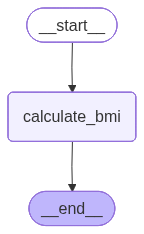

In [16]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())